## Modules

In [1]:
#Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVC
import sklearn.model_selection as ms
import sklearn.decomposition as de
import csv
from sklearn import metrics
from sklearn.datasets import load_sample_image
from skimage import io as ioi
from sklearn.preprocessing import label_binarize
from mpl_toolkits.mplot3d import Axes3D
from skimage.util import crop
from skimage.color import rgb2gray
import glob
import array as arr



#Plot in cells
%matplotlib inline

## Load the .csv file and the images

In [2]:
!unzip '/content/images_training_rev1.zip' -d '/content/images_training_rev2'

Streaming output truncated to the last 5000 lines.
  inflating: /content/images_training_rev2/images_training_rev1/174391.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174395.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174409.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174414.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174422.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174437.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174440.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174444.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174462.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174490.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174543.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174550.jpg  
  inflating: /content/ima

In [2]:
# Load data from csv file
import os
data = pd.read_csv('/content/galaxy_zoo_labels.csv')

files = os.listdir('/content/images_training_rev2/images_training_rev1')
files.sort()


#samples
n=8000
# create a simple array with numpy empty() 
imgs = []
for i in files[:n]:
    
    img = ioi.imread('/content/images_training_rev2/images_training_rev1/'+i)
    im = img[110:310,110:310]
    img_gray = rgb2gray(im)
    imgs.append(img_gray)
    
imgs = np.array(imgs)

# Due to the large number of images, only taking 8000 images
data = data[:n]



## Converting the data into the classes

In [3]:
class1=[]
class2=[]
class3=[]
class4=[]
class5=[]
class6=[]
class7=[]
class8=[]
class9=[]
class10=[]
class11=[]

for i in range(len(data)):
    c1 = list(data.iloc[i][['Class1.1','Class1.2','Class1.3']])
    c2 = list(data.iloc[i][['Class2.1','Class2.2']])
    c3 = list(data.iloc[i][['Class3.1','Class3.2']])
    c4 = list(data.iloc[i][['Class4.1','Class4.2']])
    c5 = list(data.iloc[i][['Class5.1','Class5.2','Class5.3','Class5.4']])
    c6 = list(data.iloc[i][['Class6.1','Class6.2']])
    c7 = list(data.iloc[i][['Class7.1','Class7.2','Class7.3']])
    c8 = list(data.iloc[i][['Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7']])
    c9 = list(data.iloc[i][['Class9.1', 'Class9.2', 'Class9.3']])
    c10 = list(data.iloc[i][['Class10.1', 'Class10.2', 'Class10.3']])
    c11 = list(data.iloc[i][['Class11.1', 'Class11.2', 'Class11.3', 'Class11.4', 'Class11.5', 'Class11.6']]) 
   
    class1.append((c1.index(max(c1))))
    class2.append((c2.index(max(c2))))
    class3.append((c3.index(max(c3))))
    class4.append((c4.index(max(c4))))
    class5.append((c5.index(max(c5))))
    class6.append((c6.index(max(c6))))
    class7.append((c7.index(max(c7))))
    class8.append((c8.index(max(c8))))
    class9.append((c9.index(max(c9))))
    class10.append((c10.index(max(c10))))
    class11.append((c11.index(max(c11))))

    
#print(np.sort(c1))

## Split the data and images

In [100]:

# Dividing the data set into three sets train, test, valid with the ratio of 0.2
test_ratio = 0.5
train_set, test_set, img_train, img_test = train_test_split(class8,imgs, test_size=test_ratio, random_state=160982)
train_set, valid_set, img_train, img_valid = train_test_split(train_set,img_train, test_size=test_ratio, random_state=160982)

## Reshaping the array

In [ ]:
#imtrain = img_train.reshape(img_train.shape[0],40000)
#imtest = img_test.reshape(img_test.shape[0],40000)
#imvalid = img_valid.reshape(img_valid.shape[0],40000)


## ML 

 ## Deep learning

In [5]:

# first neural network with keras tutorial
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D

In [101]:
img_train = img_train.reshape(-1, 200, 200, 1)
img_test = img_test.reshape(-1,200,200,1)

In [102]:
# Transform label into array of categories using one-hot encoding
train_set = tf.keras.utils.to_categorical(train_set, 7)
test_set  = tf.keras.utils.to_categorical(test_set,  7)

In [103]:

#model1 = tf.keras.Sequential()
#model1.add(tf.keras.layers.Flatten())
#model1.add(tf.keras.layers.Dense(2048, activation='relu'))
#model1.add(tf.keras.layers.Dense(1024, activation='relu'))
#model1.add(tf.keras.layers.Dense(512, activation='relu'))
#model1.add(tf.keras.layers.Dense(256, activation='relu'))
#model1.add(tf.keras.layers.Dense(128, activation='relu'))
#model1.add(tf.keras.layers.Dense(64, activation='relu'))
#model1.add(tf.keras.layers.Dense(37, activation='softmax'))
#model1.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

# Free up RAM in case the model definition cells were run multiple times
tf.keras.backend.clear_session()

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(4, kernel_size=(3,3), strides=1, padding="same", activation='relu', input_shape=(200,200,1)))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.Conv2D(8, kernel_size=(3,3), strides=1, activation='relu', padding="valid"))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, activation='relu', padding="valid"))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=1, activation='relu', padding="valid"))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.2, seed=42))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.2, seed=42))
cnn.add(tf.keras.layers.Dense(7, activation='softmax'))
cnn.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 4)       40        
_________________________________________________________________
average_pooling2d (AveragePo (None, 100, 100, 4)       0         
_________________________________________________________________
activation (Activation)      (None, 100, 100, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 8)         296       
_________________________________________________________________
average_pooling2d_1 (Average (None, 49, 49, 8)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 49, 49, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        2

In [104]:
sgd  = tf.keras.optimizers.SGD(lr=0.05)
adam = tf.keras.optimizers.Adam(lr=0.04)
cnn.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [105]:
#Fit the model
history = cnn.fit(np.array(img_train), np.array(train_set), epochs=5, batch_size=200, verbose=1, validation_data=(np.array(img_test),np.array(test_set)))

Epoch 1/5
10/10 [==============================] - 51s 5s/step - loss: 2.5434 - accuracy: 0.1708 - val_loss: 1.7699 - val_accuracy: 0.2438
Epoch 2/5
10/10 [==============================] - 49s 5s/step - loss: 1.7689 - accuracy: 0.2372 - val_loss: 1.7408 - val_accuracy: 0.2438
Epoch 3/5
10/10 [==============================] - 50s 5s/step - loss: 1.7441 - accuracy: 0.2442 - val_loss: 1.7369 - val_accuracy: 0.2697
Epoch 4/5
10/10 [==============================] - 49s 5s/step - loss: 1.7320 - accuracy: 0.2740 - val_loss: 1.7339 - val_accuracy: 0.2697
Epoch 5/5
10/10 [==============================] - 50s 5s/step - loss: 1.7494 - accuracy: 0.2682 - val_loss: 1.7344 - val_accuracy: 0.2697


## Regularization : Dropout

## Learning curve



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


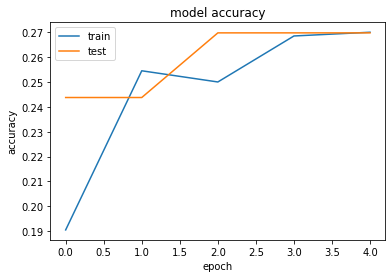

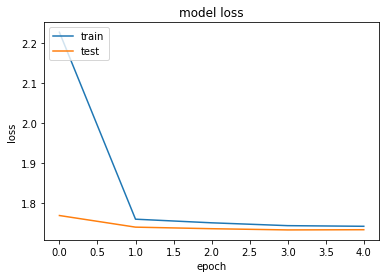

In [106]:
# plot learning curves

print("\n")
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/accuracy8')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/los8')
plt.show()

## ROC Curve


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


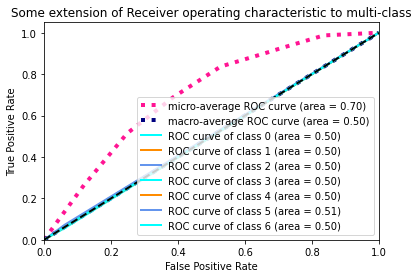

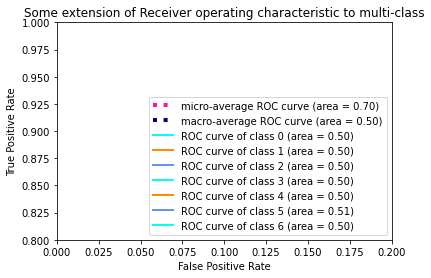

In [107]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=7
y_score = cnn.predict(img_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_set[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_set.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.savefig('/content/roc8')
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
#plt.show()